In [1]:
using PyPlot, JLD

In [15]:
using StatsBase
# al parecer aquí esta fit(Histogram, etc) y no en statistics.

In [2]:
arxname="../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1_bandascs-Trays.jld"
arx=jldopen(arxname)
nomine=names(arx)

5-element Array{String,1}:
 "alpha"
 "beta"
 "gamma"
 "spr"
 "uspr"

In [4]:
(pos, neg)=read(arx["spr"]);

In [38]:
bas=Real[]
for p in pos
    le=size(p,1)

    push!(bas, le)
end

In [23]:
tuabuela=countmap(bas)

Dict{Real,Int64} with 35 entries:
  30 => 2
  33 => 1
  32 => 1
  16 => 30
  11 => 80
  21 => 7
  46 => 1
  7  => 300
  9  => 193
  25 => 5
  10 => 147
  26 => 2
  29 => 1
  35 => 1
  42 => 1
  19 => 8
  17 => 12
  8  => 198
  22 => 8
  6  => 327
  44 => 1
  24 => 3
  4  => 477
  3  => 550
  28 => 2
  ⋮  => ⋮

In [24]:
bu=zeros(1,2)
for k in keys(tuabuela)
    aux=[k tuabuela[k]]
    bu=vcat(bu, aux)
end

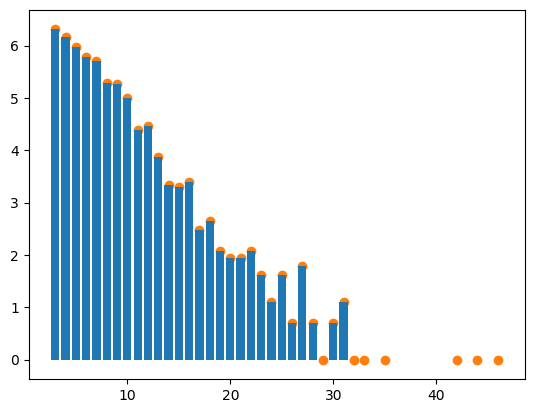

PyObject <matplotlib.collections.PathCollection object at 0x7f8db9bc4550>

In [27]:
bar(bu[:,1], log.(bu[:,2]))
scatter(bu[:,1], log.(bu[:,2]))


In [34]:
function depuratraysets(datos::Set, f::Function)
    result=Set()
    for tray in datos
        pred=f(tray)
        if pred
            push!(result, tray)
        end
    end
    return result
end

function eslarga(tray::Array, long=3)
    size(tray,1)>long
end

function escorta(tray::Array, long=10)
    size(tray,1)<long
end


function dist2D(x,y)
    #Distancia Euclediana
    result=sqrt((x[1]-y[1])^2+(x[2]-y[2])^2)
    return result
end



function semueve(tray, dist=1.0)
    x=(tray[1,1], tray[1,2])
    y=(tray[end,1], tray[end,2])
    result= dist2D(x,y)>dist
end


semueve (generic function with 2 methods)

In [45]:
spos=depuratraysets(pos, x-> eslarga(x, 10) & semueve(x, 4))
sneg=depuratraysets(neg, x-> eslarga(x, 10) & semueve(x, 4));

In [41]:
typeof(spos)

Set{Any}

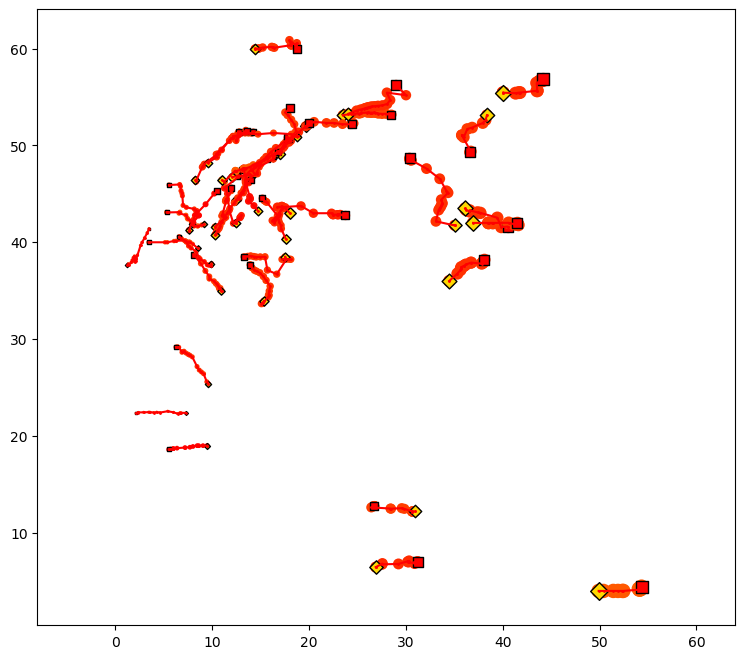

In [43]:
figure(figsize=(9,8))
#axis("equal")
xlim(0.0,65.0)
ylim(0.0,65.0)
tolerancia=1.0
minlong=10
maxlong=20
#colores=Union{}
axis("equal")

for p in spos
    gordura=abs(p[:3])
    longus,gordus=size(p)
    if (mean(gordura)>tolerancia) && (longus>minlong) && longus < maxlong
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        colores=scatter(xxpos,yypos, s=gordura*2, edgecolors="none", 
        c=tiempos, cmap="autumn", vmin=0.0, vmax=0.72 )
        principios=scatter(xxpos[1],yypos[1], s=gordura*1.5,
        edgecolors="black", 
        color="r", marker="s", label="Inicio" )
        finales=scatter(xxpos[end],yypos[end], s=gordura*1.5, edgecolors="black", 
        color="gold", marker="D", label="Final" )
        # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end


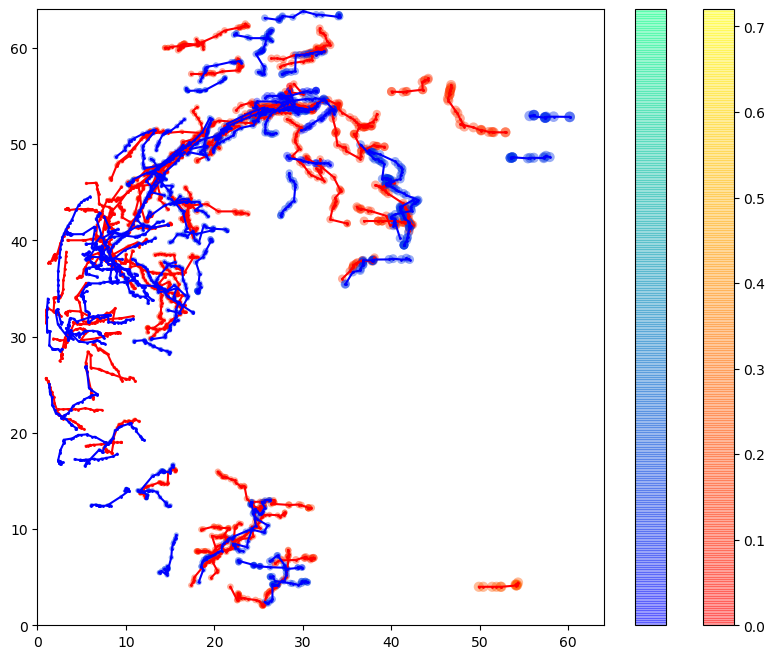

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8db4c3d490>

In [47]:
figure(figsize=(9,8))
#axis("equal")
xlim(0,64)
ylim(0,64)
bolitasrojas=0
bolitasazules=0

tolerancia=1.0
minlong=3

for p in spos
    gordura=abs(p[:3])
    longus,falsus=size(p)
    if mean(gordura)>tolerancia
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        edgecolors="none", alpha=0.4, c=tiempos, cmap="autumn", vmin=0, vmax=0.72 )
       # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in sneg
    gordura=abs(p[:3])
    longus,falsus=size(p)
    if mean(gordura)>tolerancia
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="b")
        bolitasazules=scatter(xxpos,yypos, s=gordura,
        edgecolors="none", alpha=0.4, c=tiempos, cmap="winter",
        vmin=0,vmax=0.72)
        #annotate(round(tiempos[1]/7022,4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        #annotate(round(tiempos[end]/7022,4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

colorbar(bolitasrojas, fraction=0.046)
colorbar(bolitasazules, fraction=0.052, ticks=[])
